# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

a3966693dc50793f59f6762df57c63f7


### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city), city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        real_city_date = datetime.datetime.fromtimestamp(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": real_city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayacucho http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=puerto ayacucho


Processing Record 2 of Set 1 | airuk http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=airuk
Processing Record 3 of Set 1 | mashhad http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=mashhad
Processing Record 4 of Set 1 | ushuaia http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=ushuaia
Processing Record 5 of Set 1 | tamanrasset http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=tamanrasset
Processing Record 6 of Set 1 | sakaiminato http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=sakaiminato
Processing Record 7 of Set 1 | port-aux-francais http://api.openweathermap.org/data/2.5/weather?appid=a3966693dc50793f59f6762df57c63f7&units=imperial&q=port-aux-francais
Processing Record 8 of Set 1 | pisco http://api.openweathermap.org/d

In [188]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [189]:
# Display sample data
city_data_df.head(-10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayacucho,5.6639,-67.6236,91.81,55,76,3.33,VE,2023-10-06 12:52:39
1,airuk,7.2772,168.8203,82.74,79,100,15.48,MH,2023-10-06 12:52:39
2,mashhad,36.2970,59.6062,57.34,67,40,6.91,IR,2023-10-06 12:52:39
3,ushuaia,-54.8000,-68.3000,44.22,56,0,8.01,AR,2023-10-06 12:52:40
4,tamanrasset,22.7850,5.5228,85.91,16,40,5.75,DZ,2023-10-06 12:52:40
...,...,...,...,...,...,...,...,...,...
523,dakhla,23.6848,-15.9580,91.42,29,0,17.27,EH,2023-10-06 12:54:13
524,cam ranh,11.9214,109.1591,78.76,89,20,2.30,VN,2023-10-06 12:54:13
525,sao vicente,-23.9631,-46.3919,96.98,54,100,4.61,BR,2023-10-06 12:54:14
526,wanning,18.8003,110.3967,78.76,87,86,3.69,CN,2023-10-06 12:54:14


In [190]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [191]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayacucho,5.6639,-67.6236,91.81,55,76,3.33,VE,2023-10-06 12:52:39
1,airuk,7.2772,168.8203,82.74,79,100,15.48,MH,2023-10-06 12:52:39
2,mashhad,36.2970,59.6062,57.34,67,40,6.91,IR,2023-10-06 12:52:39
3,ushuaia,-54.8000,-68.3000,44.22,56,0,8.01,AR,2023-10-06 12:52:40
4,tamanrasset,22.7850,5.5228,85.91,16,40,5.75,DZ,2023-10-06 12:52:40


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

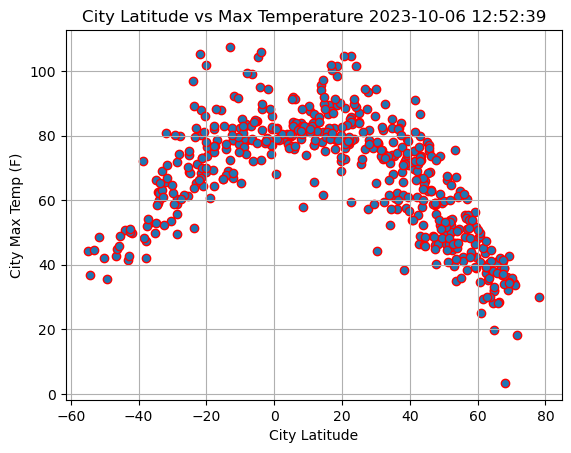

In [192]:
# Build scatter plot for latitude vs. temperature
Latitude = city_data_df['Lat']
MaximumTemp = city_data_df['Max Temp']
plt.scatter(Latitude,MaximumTemp,marker='o',edgecolors = 'red')

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Max Temp (F)")
plt.title(f"City Latitude vs Max Temperature {city_data_df['Date'][0]}")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

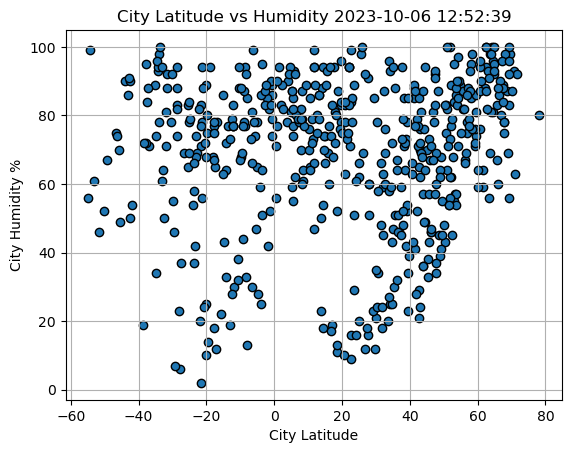

In [193]:
# Build the scatter plots for latitude vs. humidity
Latitude = city_data_df['Lat']
Humidity = city_data_df['Humidity']
plt.scatter(Latitude,Humidity,marker='o',edgecolors = 'black')
# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity %")
plt.title(f"City Latitude vs Humidity {city_data_df['Date'][0]}")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

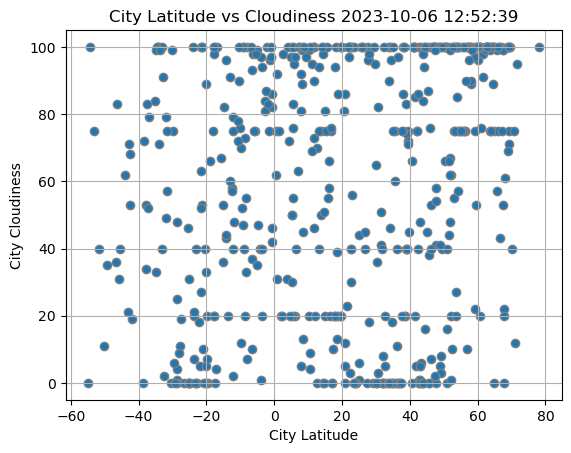

In [194]:
# Build the scatter plots for latitude vs. cloudiness
Latitude = city_data_df['Lat']
Cloudiness = city_data_df['Cloudiness']
plt.scatter(Latitude,Cloudiness,marker='o',edgecolors = 'gray')

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness")
plt.title(f"City Latitude vs Cloudiness {city_data_df['Date'][0]}")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

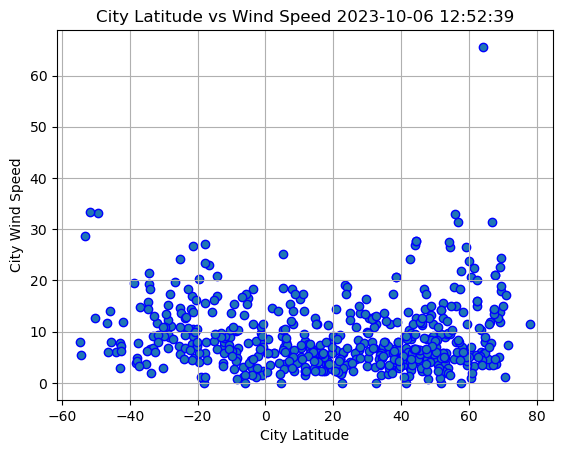

In [195]:
# latitude vs. wind speed
Latitude = city_data_df['Lat']
WindSpeed = city_data_df['Wind Speed']
plt.scatter(Latitude,WindSpeed,marker='o',edgecolors = 'blue')

plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed")
plt.title(f"City Latitude vs Wind Speed {city_data_df['Date'][0]}")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [207]:
#Linear Regression plots
def lineregress(x, y, title="", x_label="", y_label=""):
    # Plotting scatter points
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Calculating linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    plt.plot(x, regress_values, "r-")
    print(f"The r-squared is: {rvalue**2}")

    return plt.show()



In [308]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].set_index('City')
# Display sample data
northern_hemi_df.head(20)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
puerto ayacucho,5.6639,-67.6236,91.81,55,76,3.33,VE,2023-10-06 12:52:39
airuk,7.2772,168.8203,82.74,79,100,15.48,MH,2023-10-06 12:52:39
mashhad,36.2970,59.6062,57.34,67,40,6.91,IR,2023-10-06 12:52:39
tamanrasset,22.7850,5.5228,85.91,16,40,5.75,DZ,2023-10-06 12:52:40
sakaiminato,35.5500,133.2333,60.78,88,75,5.75,JP,2023-10-06 12:48:31
hilo,19.7297,-155.0900,80.28,78,100,5.75,US,2023-10-06 12:52:41
san patricio,28.0170,-97.5169,81.88,60,96,13.56,US,2023-10-06 12:52:41
tongren,27.7172,109.1853,57.27,91,100,6.33,CN,2023-10-06 12:52:41
hobyo,5.3505,48.5268,80.08,81,50,18.45,SO,2023-10-06 12:52:42


In [309]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].set_index('City')
# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
ushuaia,-54.8000,-68.3000,44.22,56,0,8.01,AR,2023-10-06 12:52:40
port-aux-francais,-49.3500,70.2167,35.47,67,35,33.24,TF,2023-10-06 12:52:40
pisco,-13.7000,-76.2167,69.03,77,20,9.22,PE,2023-10-06 12:49:14
hermanus,-34.4187,19.2345,59.23,93,100,19.35,ZA,2023-10-06 12:52:40
waitangi,-43.9535,-176.5597,50.83,90,62,5.99,NZ,2023-10-06 12:52:41


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.696435686291827


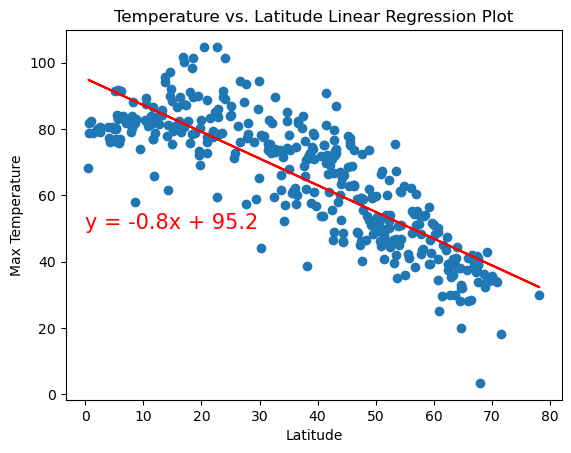

In [310]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
lineregress(x,y,title="Temperature vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Max Temperature")

The r-squared is: 0.6113082495360308


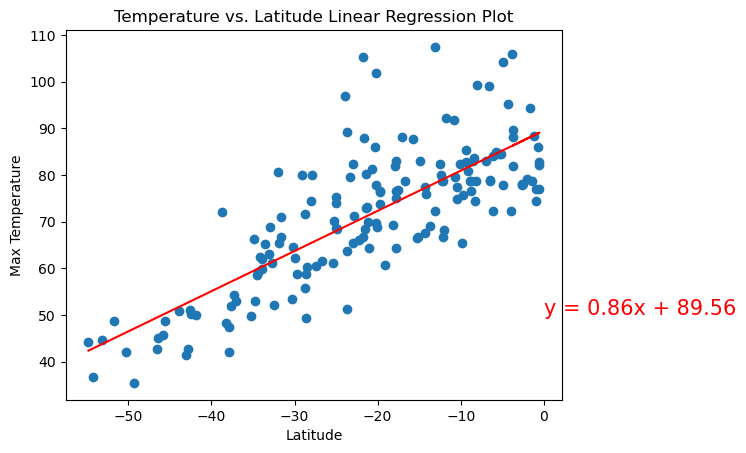

In [311]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
lineregress(x,y,title="Temperature vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Max Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.016148249240786023


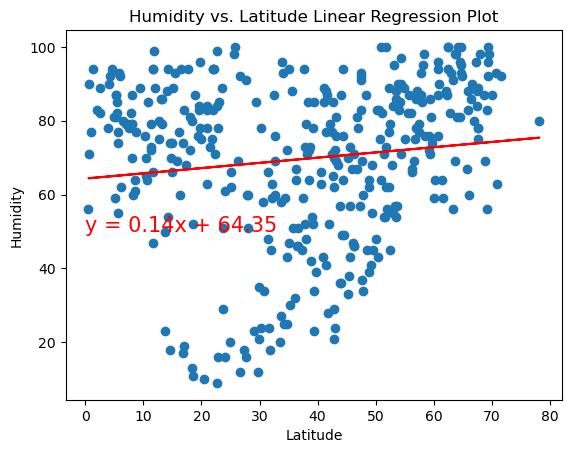

In [312]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
lineregress(x,y,title="Humidity vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Humidity")

The r-squared is: 0.0015230693603413765


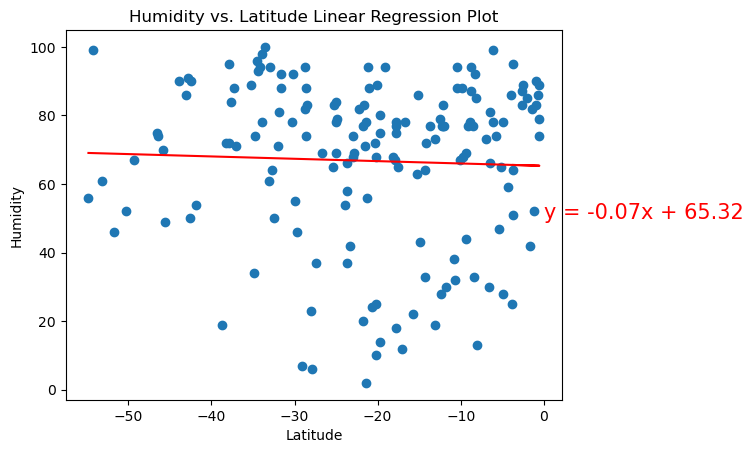

In [313]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
lineregress(x,y,title="Humidity vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.030479219564674184


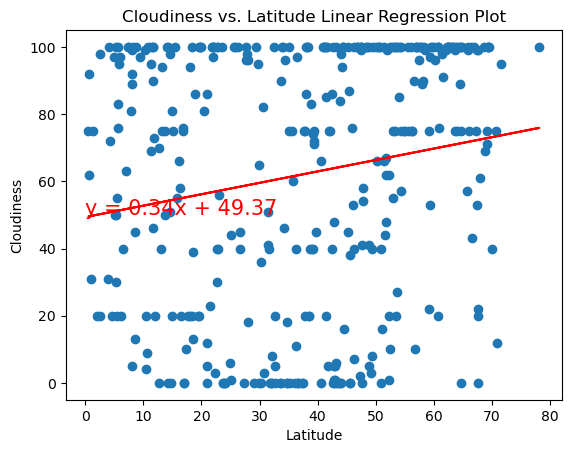

In [314]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
lineregress(x,y,title="Cloudiness vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Cloudiness")

The r-squared is: 0.03351345220586166


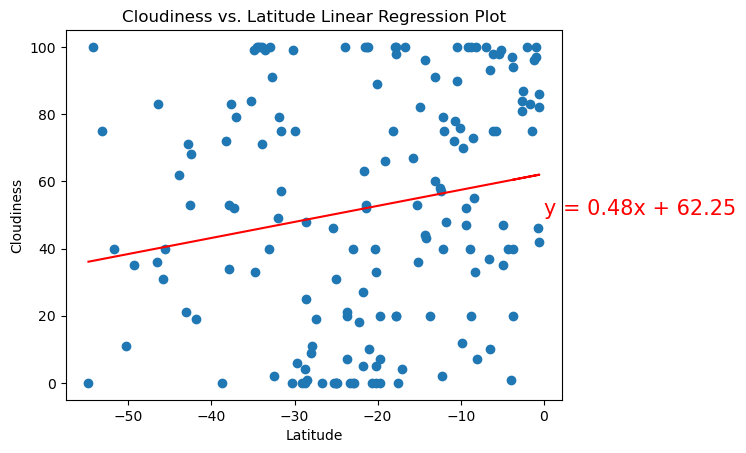

In [315]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
lineregress(x,y,title="Cloudiness vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04729708921892944


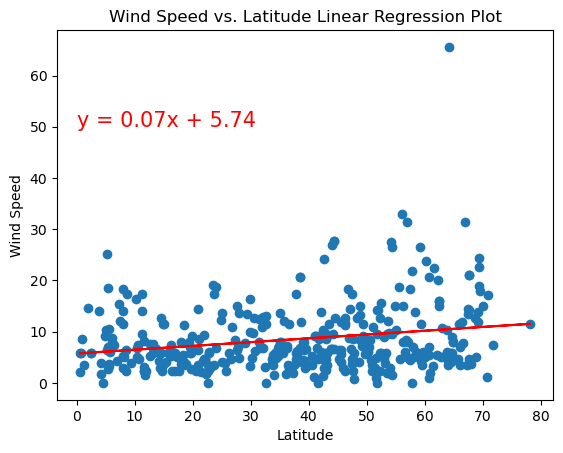

In [316]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
lineregress(x,y,title="Wind Speed vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Wind Speed")

The r-squared is: 0.061596813334864504


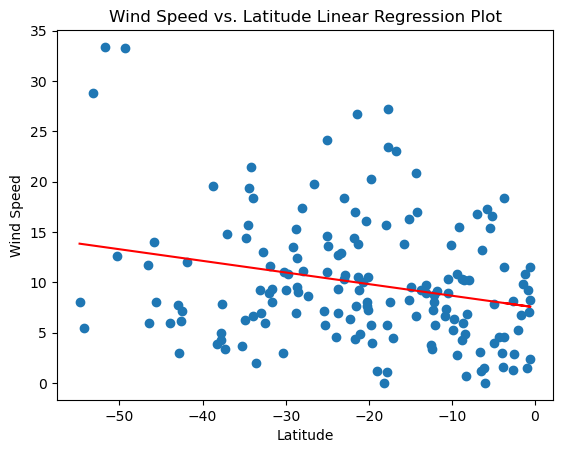

In [317]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
lineregress(x,y,title="Wind Speed vs. Latitude Linear Regression Plot",x_label = "Latitude",y_label = "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE